# Bivariate:  Num/Num



## 01. Visualization 

### 01.01. Scatterplot

It's usueful to visualize each one of the features against the label, we can see if the data follows a pattern.

Visualizing num/num relationshiops is a great way to better understand both the correlation coefficient(r) and the assumptions (continuous data, linearity, heteroscedasticity)

In [1]:
# https://www.kaggle.com/mirichoi0218/insurance
import pandas as pd 
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


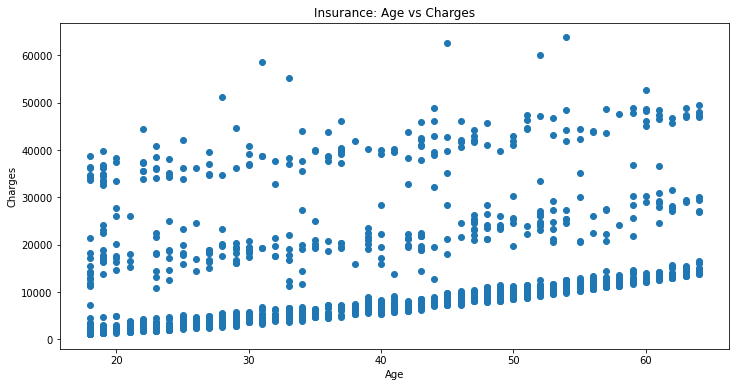

In [2]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (12,6))
plt.scatter(df.age,df.charges)
plt.title("Insurance: Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [3]:
# We can see three different groups

### 01.02. Separate Groups

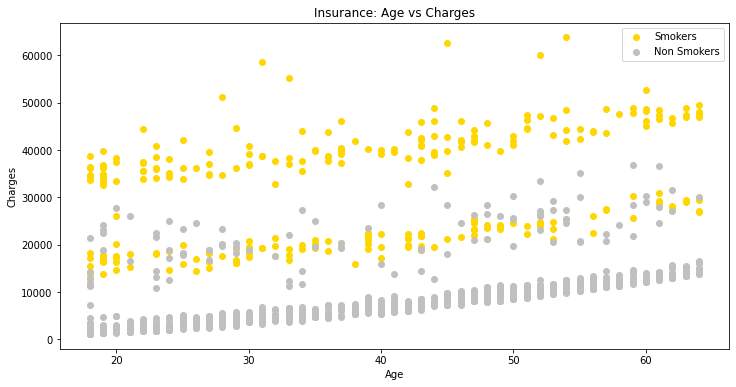

In [4]:
#groups/clusters 
df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']

plt.figure(figsize = (12,6))
plt.scatter(df_smoker.age,df_smoker.charges,label = 'Smokers',color = 'gold')
plt.scatter(df_nonsmoker.age,df_nonsmoker.charges,label = 'Non Smokers',color = 'silver')
plt.title("Insurance: Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

In [5]:
#We see that Non Smokers cover most of the minimum charges, it is an important
#feature for the predictive model

### 01.03. Plot Samples

In [6]:
df_smoker.shape,df_nonsmoker.shape

((274, 7), (1064, 7))

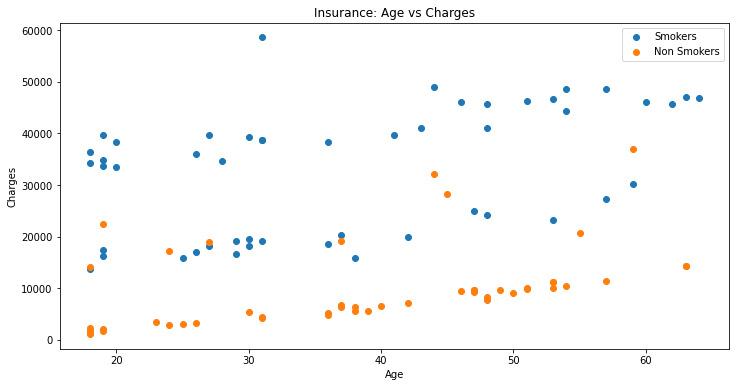

In [7]:
#samples
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.figure(figsize = (12,6))
plt.scatter(df_smoker_reduced.age,df_smoker_reduced.charges,label = 'Smokers')
plt.scatter(df_nonsmoker_reduced.age,df_nonsmoker_reduced.charges,label = 'Non Smokers')
plt.title("Insurance: Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

In [8]:
# We still have a clear division between Smokers, there are more factors that
# are spliting that group

### 01.04. Regression Line (OLS)

Plot the line that minimize the sum of squared residuals between each dot and the line itself. The regression line is a bivariate predictor. It helps to understand the nature of the relationship 


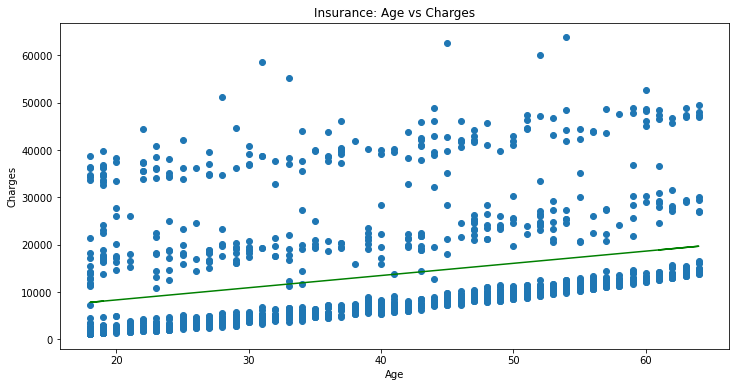

In [9]:
# y = mx + b
from scipy import stats
m,b,r,p,err = stats.linregress(df.age,df.charges)
x = df.age
y = m*x + b 

plt.figure(figsize = (12,6))
plt.plot(x,y,color = 'green')

plt.scatter(df.age,df.charges)
plt.title("Insurance: Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [10]:
# the regresion line is to low, it means most of the data is low, thats why 
# those points are pulling down the regression line. 

## 02. Heteroscedasticity 

**It is one of the assumptions of OLS** It represent the spread of dots across all values of 'x'. It refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it. 


While the ordinary least squares estimator is still unbiased in the presence of heteroscedasticity, it is inefficient and generalized least squares should be used instead

### 02.01. Info from the test

* **lm** lagrange multiplier statistic

* **lm_pvalue**  p-value of lagrange multiplier test

* **fvalue**
    f-statistic of the hypothesis that the error variance does not depend
on x. This is an alternative test variant not the original LM test.

* **f_pvalue**
    p-value for the f-statistic



p-values, it represent the probability that the stats found does not represent future collections. The hetreoscedasticity found was by chance. 

In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula ='charges~age',data = df).fit()
# dependet~independent
#Create a regression line, it saves residuals for further use 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
het_white(model.resid,model.model.exog)

(0.00271252630518215,
 0.9986446561566231,
 0.0013532249471752717,
 0.9986476916187165)

In [13]:
white_test = het_white(model.resid,model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid,model.model.exog)

output_het = pd.DataFrame(columns = ["LM stat", "LM p", "F stat", "F stat p"])

output_het.loc["White"] = white_test
output_het.loc["Breush-Pagan"] = breuschpagan_test

output_het

,LM stat,LM p,F stat,F stat p
White,0.002713,0.998645,0.001353,0.998648
Breush-Pagan,0.000413,0.983776,0.000413,0.983792


In [14]:
#Good result found, small stats and large p-value
#indicating that the small heteroscedasticity found
#there is likely it is not going to be appeared again

In [15]:
import seaborn as sns
sns.set(color_codes = True)

### 02.02. jointplot()

Draw a plot of two variables with bivariate and univariate graphs

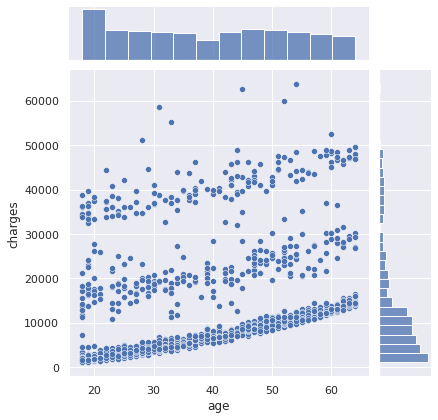

In [16]:
sns.jointplot(x = "age", y = "charges", data = df)
plt.show()

**HEX**

It indicates with hex how dense the data is

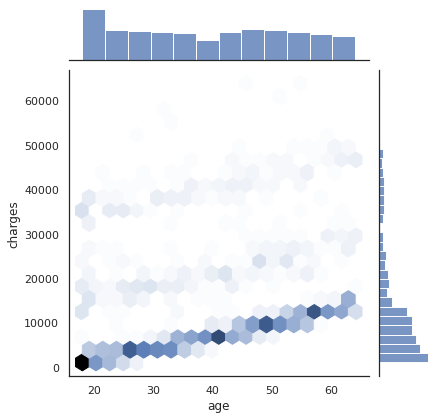

In [17]:
sns.set_style("white")
sns.jointplot(x = "age", y = "charges", data = df,kind = "hex")
plt.show()

**KDE (kernel density estimation)**

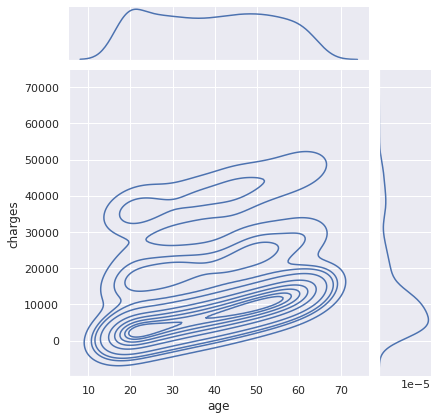

In [18]:
sns.set_style("darkgrid")
sns.jointplot(x = "age", y = "charges", data = df,kind = "kde")
plt.show()

### 02.03. pairplot()

Plot for every singe num/num pair

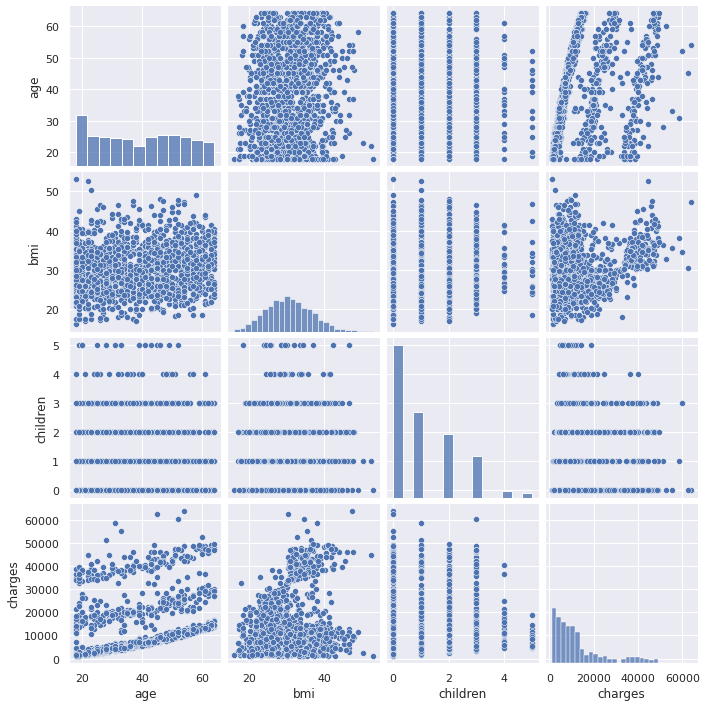

In [19]:
df.dropna(inplace = True)
sns.pairplot(df)
plt.show()